In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools

In [2]:
os.chdir('/Users/alisdghnia/Desktop/Research Datasets/')

In [3]:
df = pd.read_csv('names-mc-volume.csv')
df_1 = pd.read_csv('technical-terms-top-29.csv')

In [4]:
all_df = pd.merge(df, df_1, left_on = 'Name', right_on = 'Unnamed: 0')

In [5]:
all_df = all_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

In [6]:
all_df = all_df[np.log10(all_df.market_cap) >= 1]
all_df

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Name,market_cap,volume_y,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,0.000615,0.000307,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,0.000530,0.000000,0.0,0.0,0.000235,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.001095,0.000360,0.0,0.0,0.000030,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000060
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.001014,0.000000,0.0,0.0,0.000078,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.000000
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,0.000286,0.000261,0.0,0.0,0.000025,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,0.000042,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,0.000068,0.000158,0.0,0.0,0.000113,0.0,0.000045,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000023
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.000804,0.000262,0.0,0.0,0.000017,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.001118,0.000219,0.0,0.0,0.000196,0.0,0.000000,...,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.000231


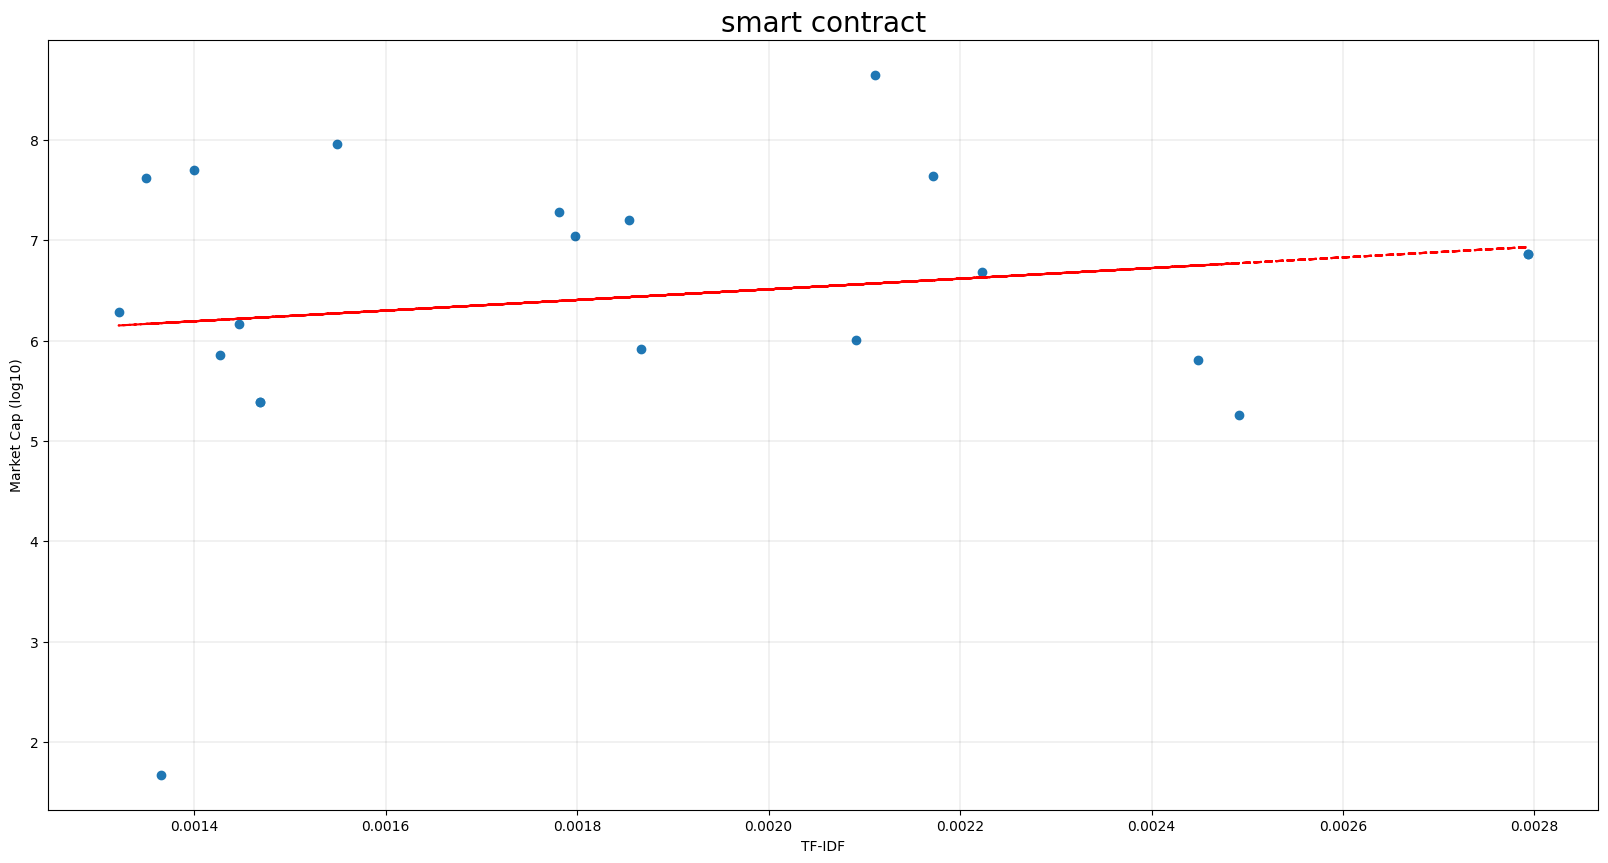

In [7]:
top_2 = all_df['smart contract'].quantile(0.98)
top_df = all_df[all_df['smart contract'] > top_2]
fig = plt.figure(figsize=(20,10))
fig.add_subplot(111)

x = top_df['smart contract']
y=np.log10(top_df.market_cap)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)

plt.title('smart contract', fontsize = 20)
plt.xlabel('TF-IDF')
plt.ylabel('Market Cap (log10)')

plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(color='black', linestyle='-', linewidth=0.08)
plt.plot(x,p(x),"r--")

# plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
# plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
# plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
plt.show()

In [8]:
all_df.columns[3:]

Index(['blockchain', 'smart contract', 'proof work', 'proofofwork', 'pow',
       'proof stake', 'proofofstake', 'pos', 'multisig', 'hash rate',
       'merkle tree', 'side chain', 'multicoin wallet', 'multisig wallet',
       'delegated proof stake', 'delegated pos', 'artificial intelligence',
       'machine learning', 'zeroknowledge proof', 'zero knowledge proof',
       'multisignature architecture', 'multi signature architecture',
       'multiparty computation', 'mpc', 'multi party computation',
       'privacy preserving protocols', 'privacypreserving protocols',
       'decentralized applications', 'dapps'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(all_df.iloc[:, 3:])
scaled_values

array([[-0.17312025,  0.17799874,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [-0.30396121, -0.70619233,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [ 0.56320568,  0.32896207,  0.        , ...,  0.        ,
        -0.29416696,  0.09615249],
       ...,
       [ 0.11732645,  0.04798564,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214],
       [ 0.59894688, -0.07633449,  0.        , ...,  0.        ,
         0.77949876,  1.01674221],
       [ 0.82111565, -0.63206914,  0.        , ...,  0.        ,
        -0.29416696, -0.22766214]])

In [16]:
all_df.iloc[:, 3:] = scaled_values
all_df

,Name,market_cap,volume_y,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,-0.173120,0.177999,0.0,-0.21703,-0.555823,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.227662
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,-0.303961,-0.706192,0.0,-0.21703,0.114753,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.227662
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.563206,0.328962,0.0,-0.21703,-0.470371,-0.03122,0.281328,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,0.096152
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.439717,-0.706192,0.0,-0.21703,-0.333540,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,0.917100,-0.227662
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,-0.677494,0.045201,0.0,-0.21703,-0.484935,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.227662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,-1.052760,-0.706192,0.0,-0.21703,-0.555823,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.227662
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,-1.012505,-0.251217,0.0,-0.21703,-0.233898,-0.03122,0.283483,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.105670
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.117326,0.047986,0.0,-0.21703,-0.506017,-0.03122,-0.184607,...,-0.123570,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,-0.294167,-0.227662
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.598947,-0.076334,0.0,-0.21703,0.002432,-0.03122,-0.184607,...,0.788994,-0.051971,0.0,-0.087858,-0.054532,-0.034745,-0.03122,0.0,0.779499,1.016742


# Graphs

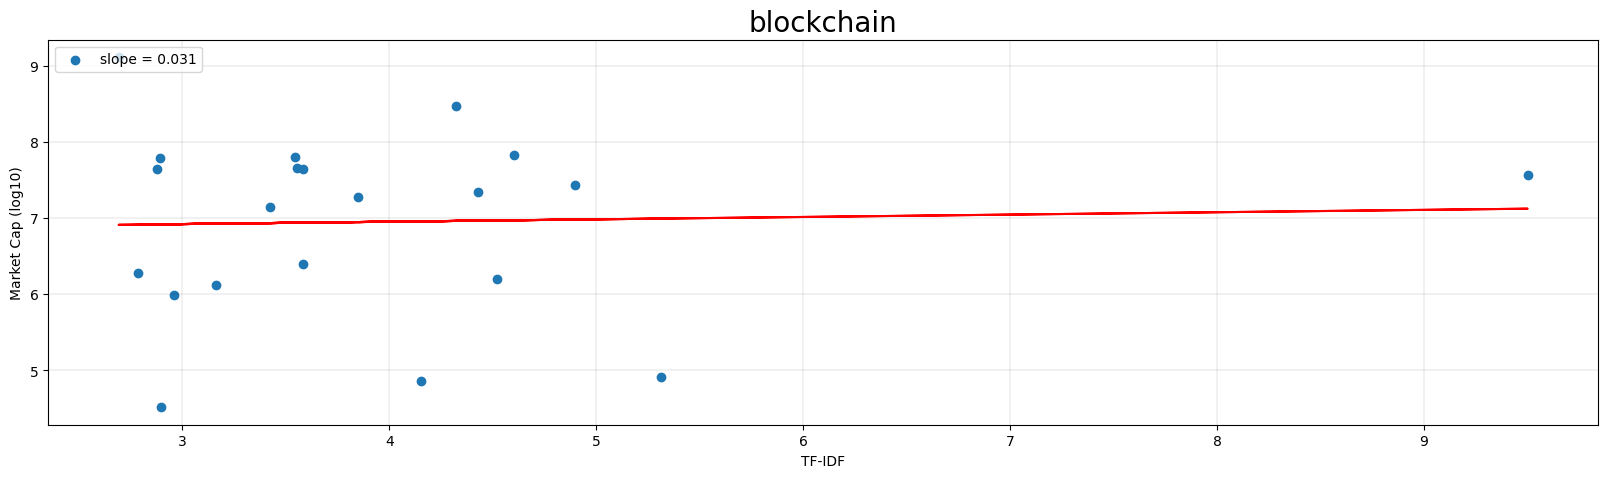

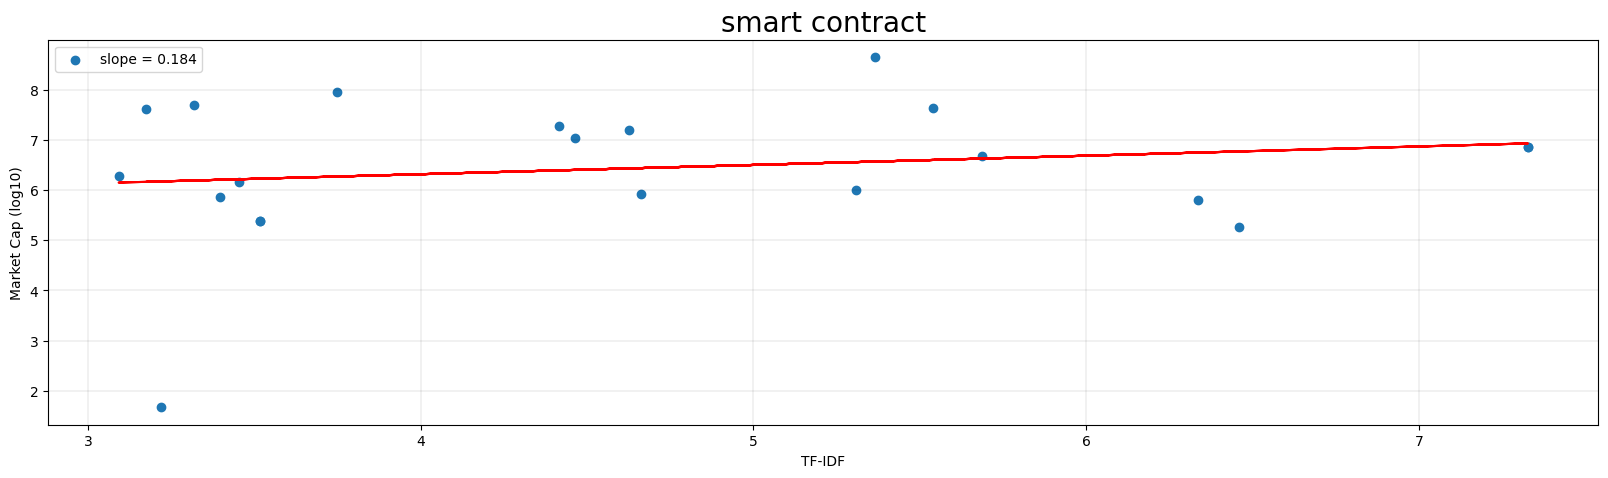

proof work is not good for visualization


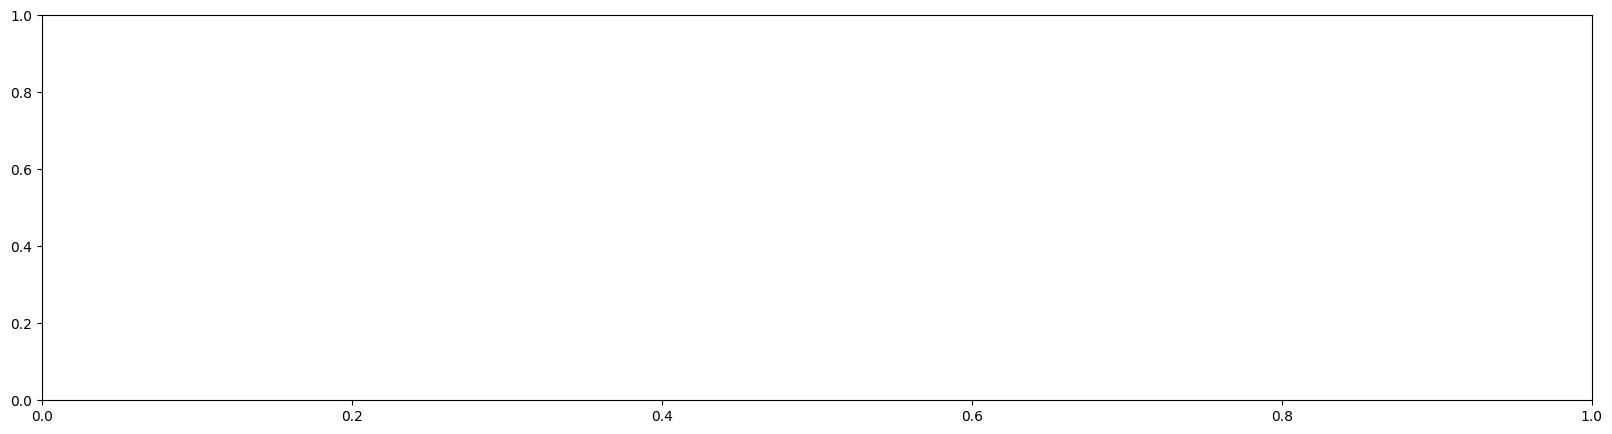

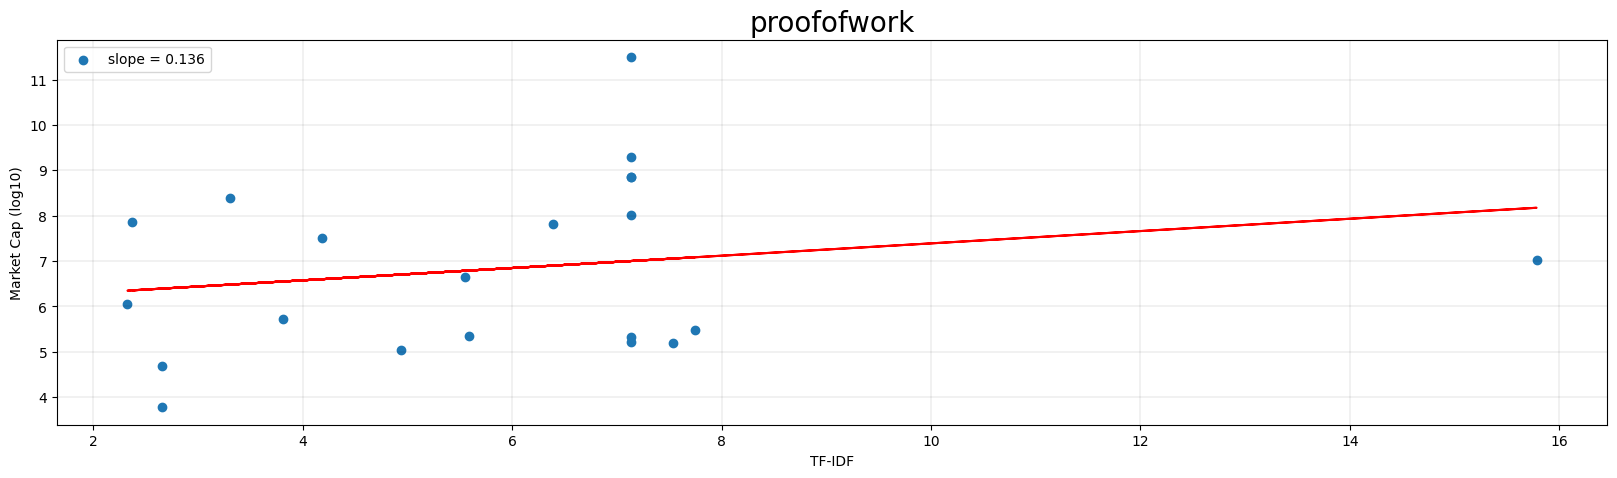

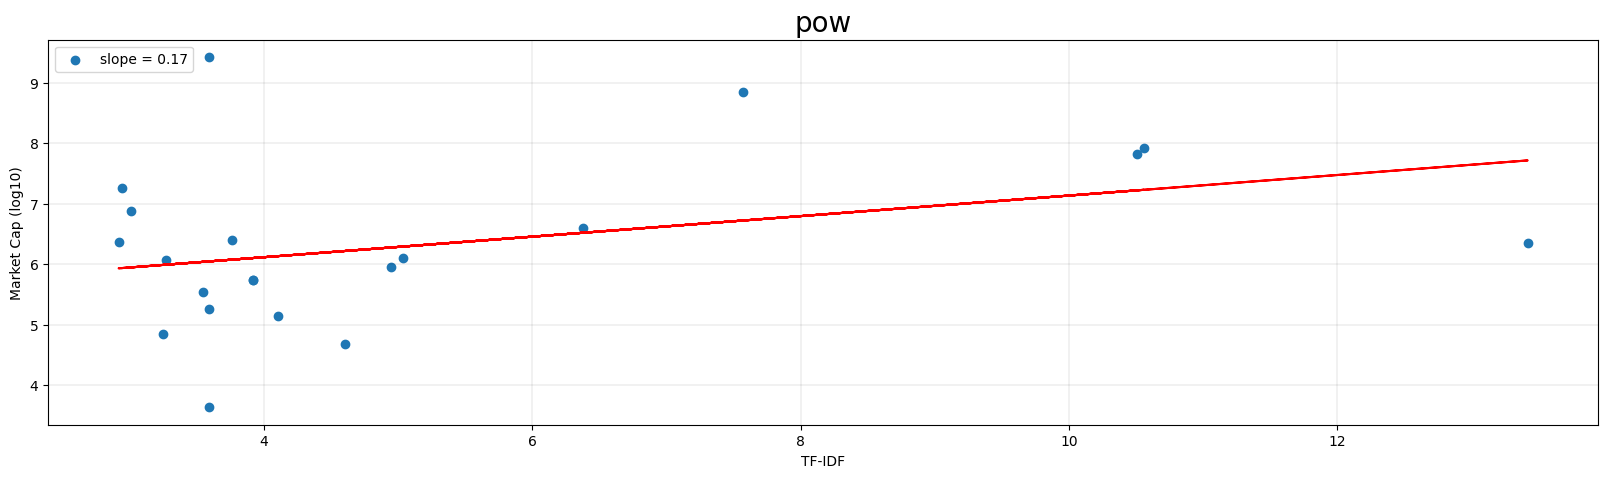

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


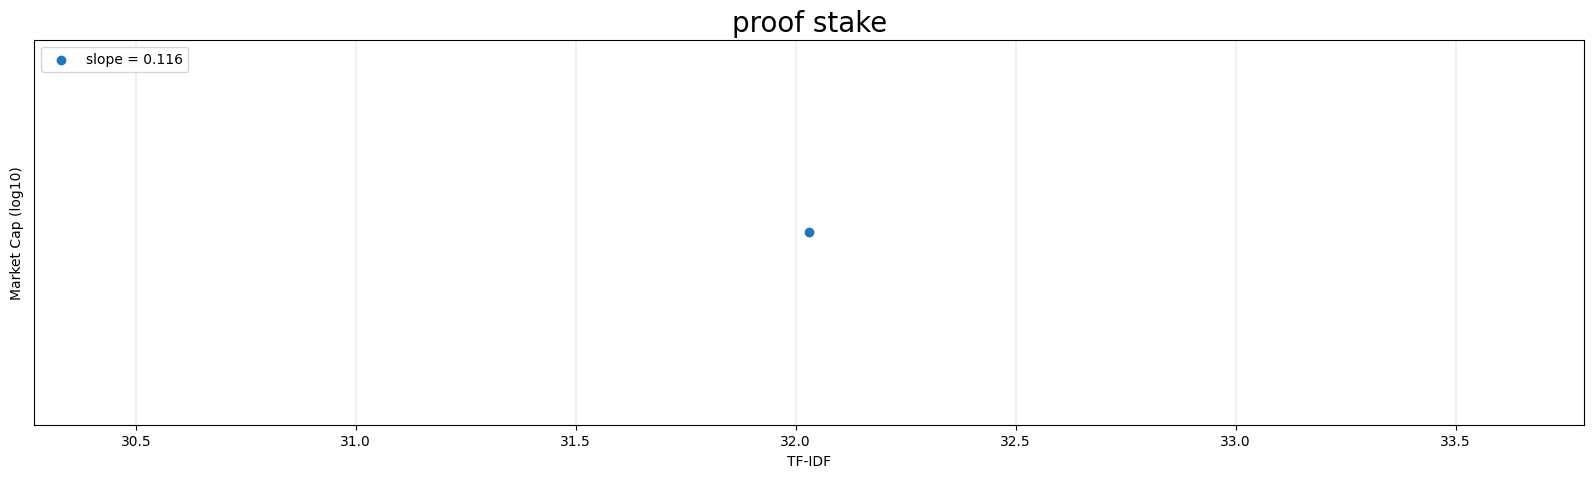

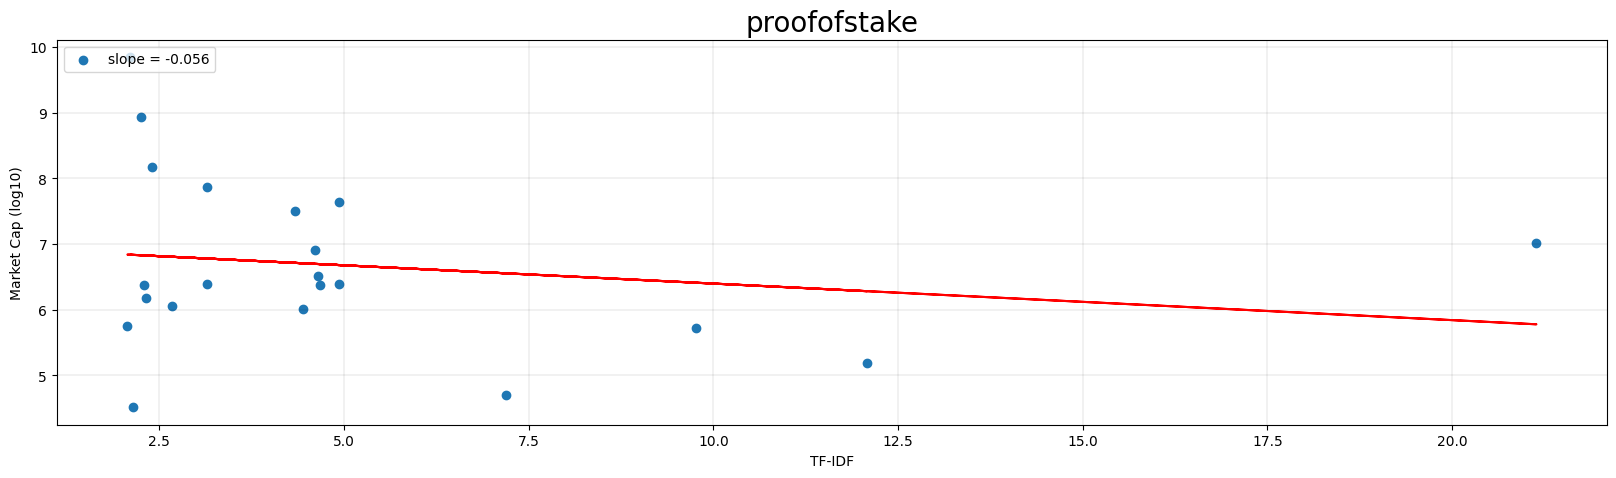

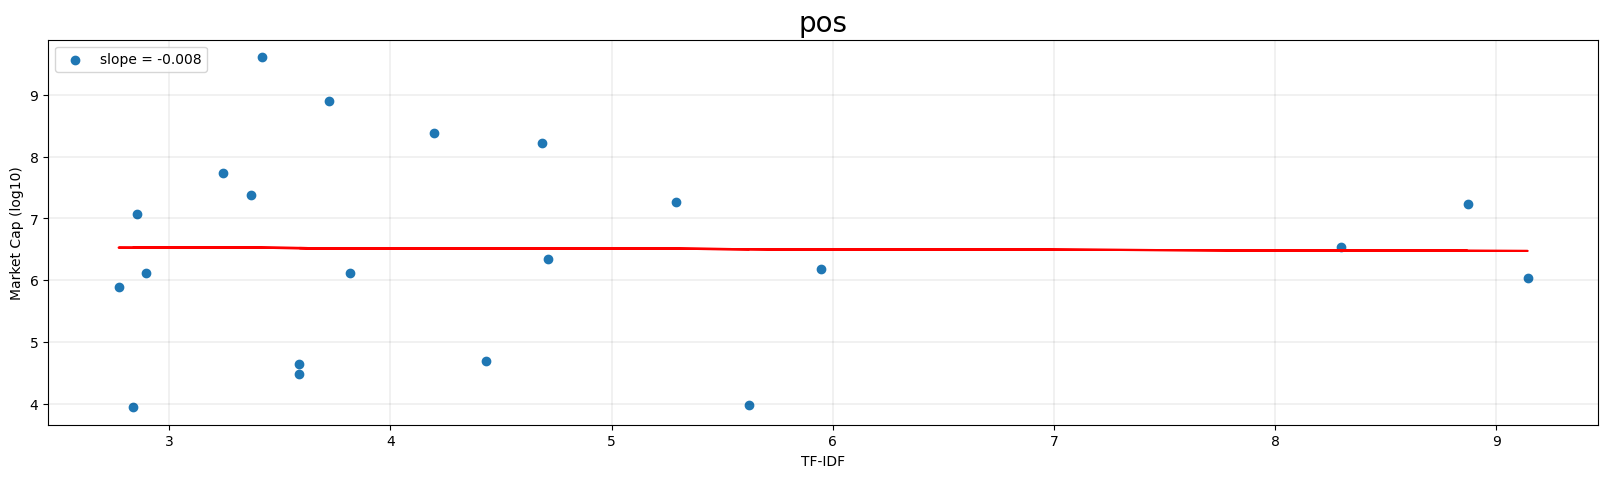

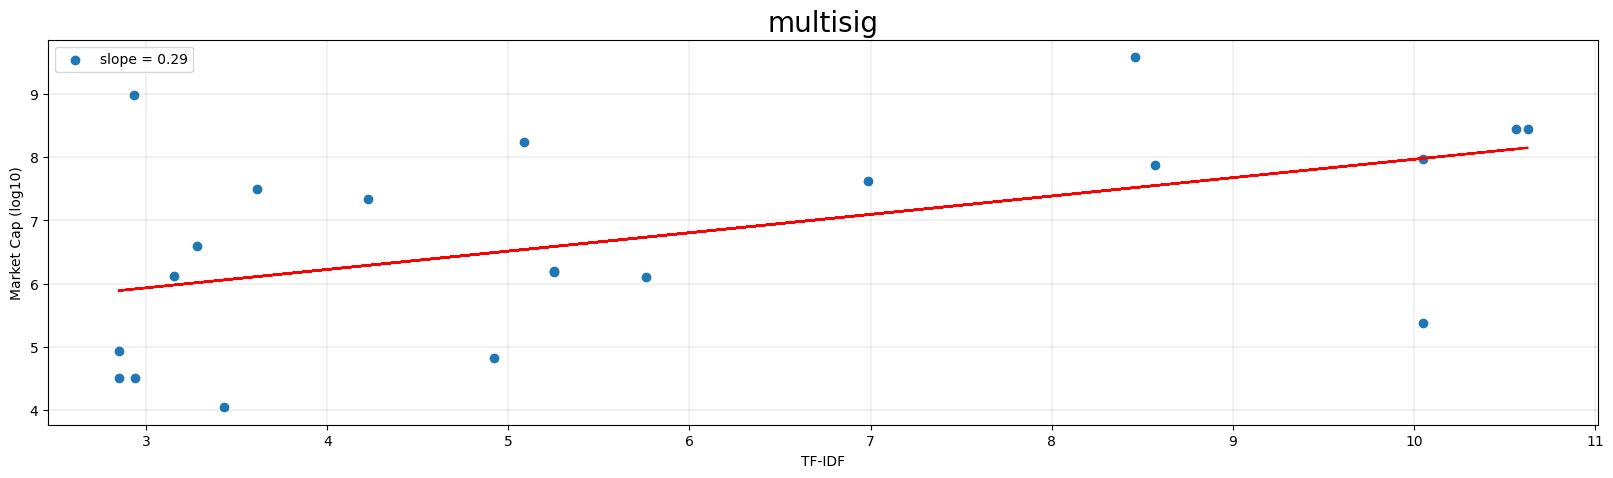

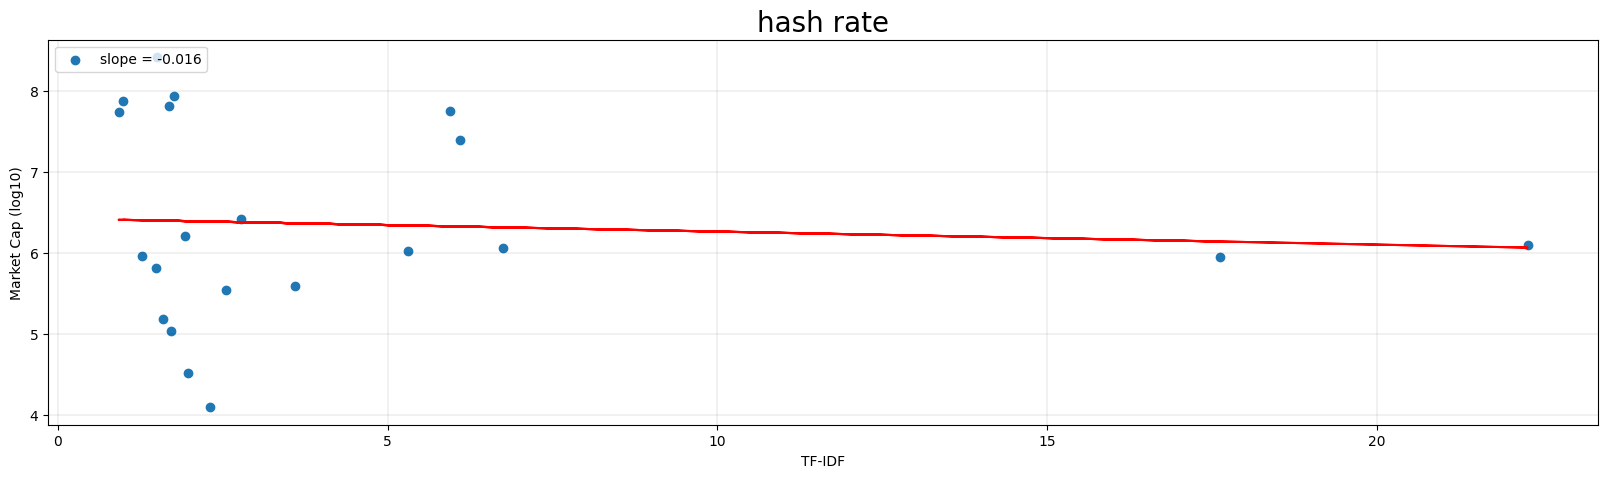

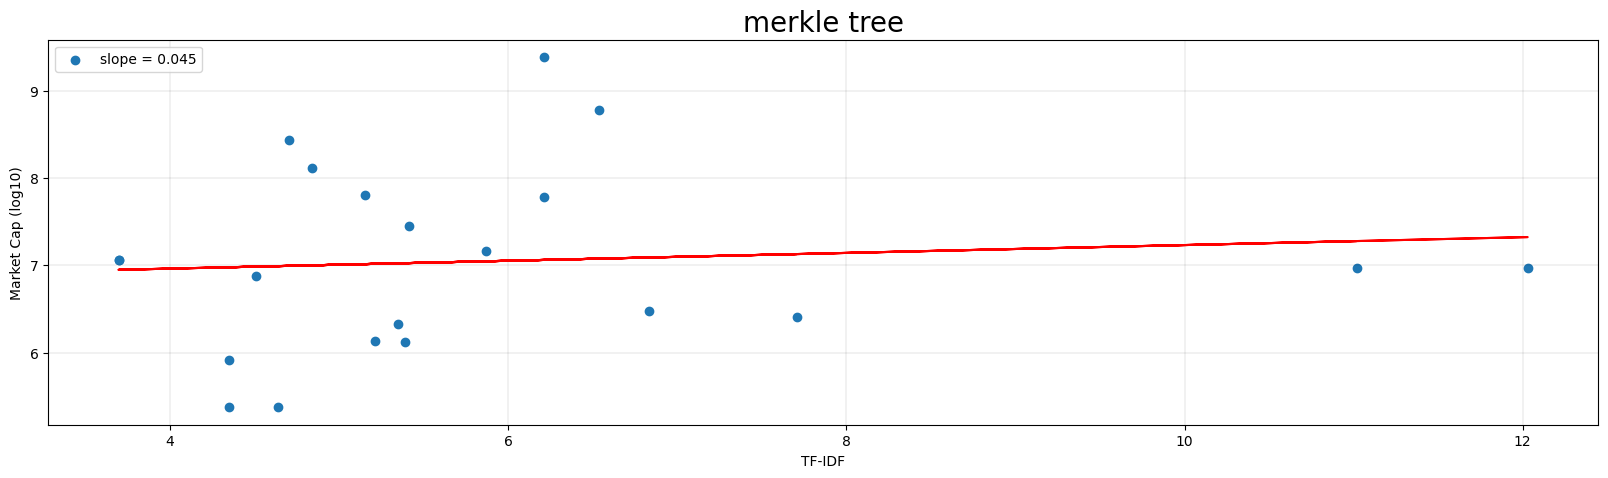

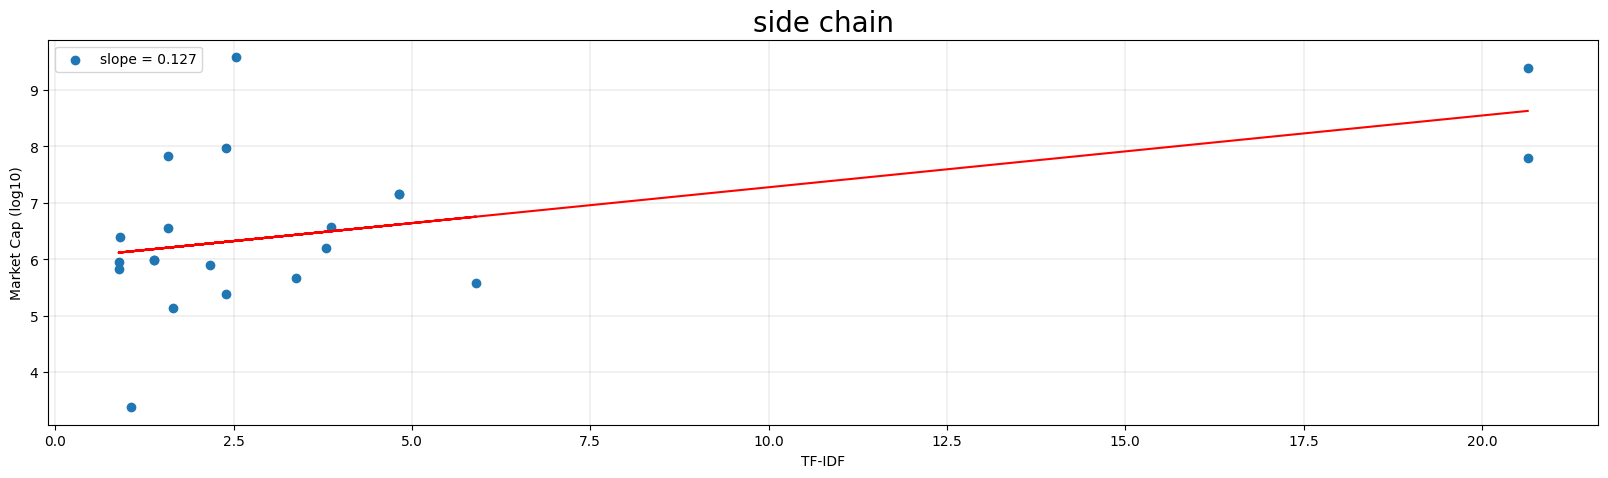

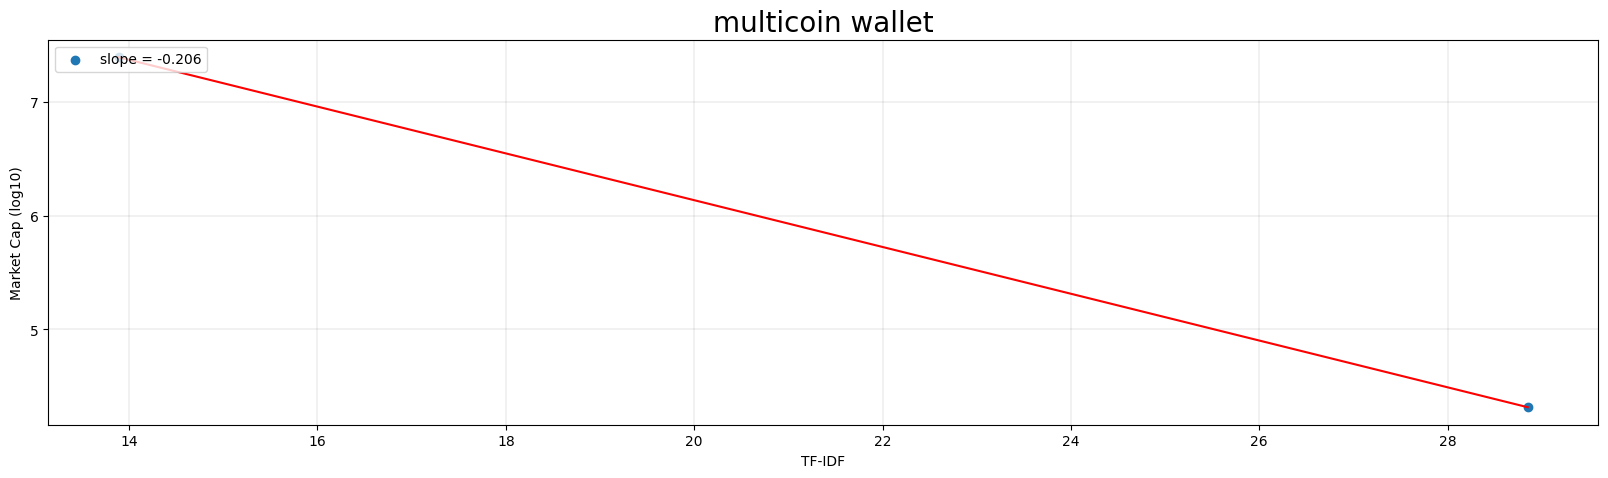

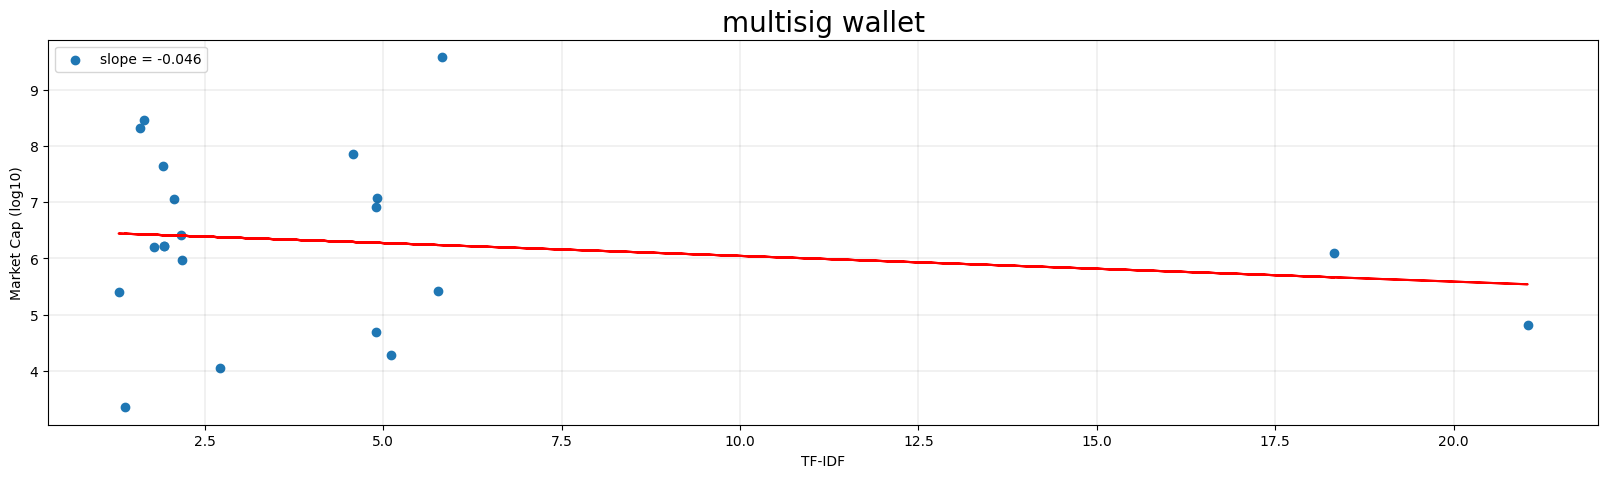

delegated proof stake is not good for visualization


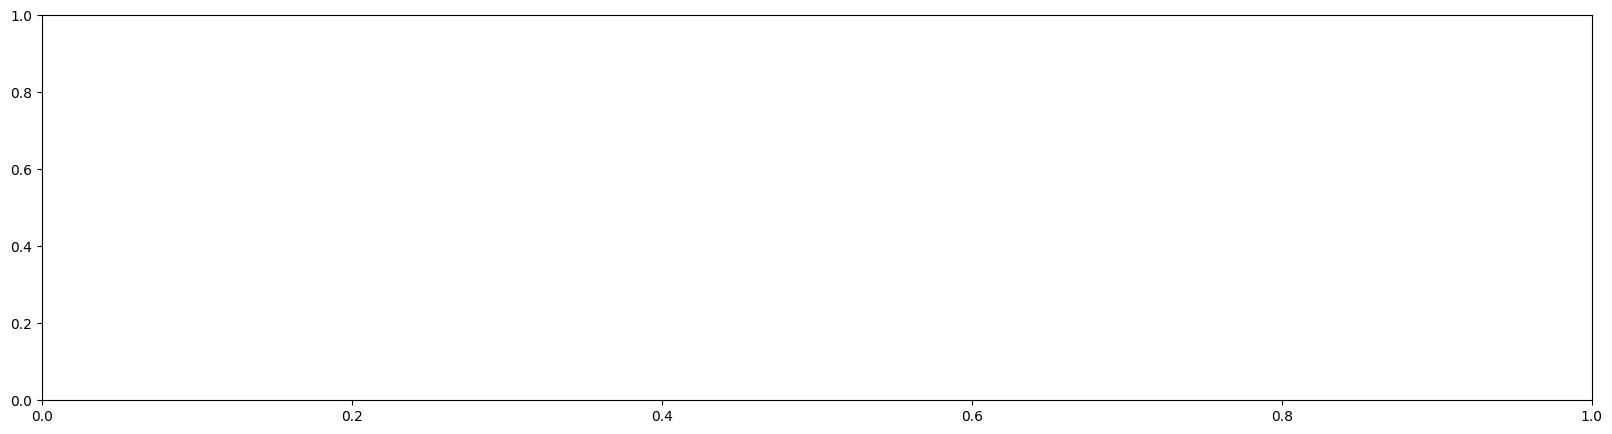

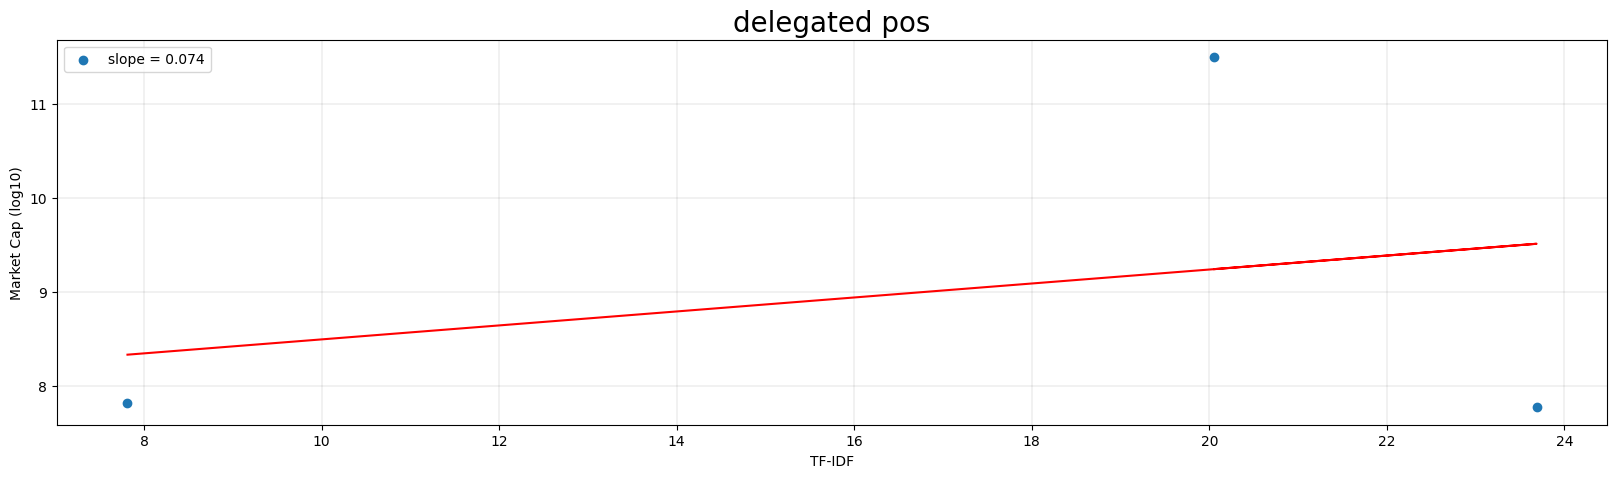

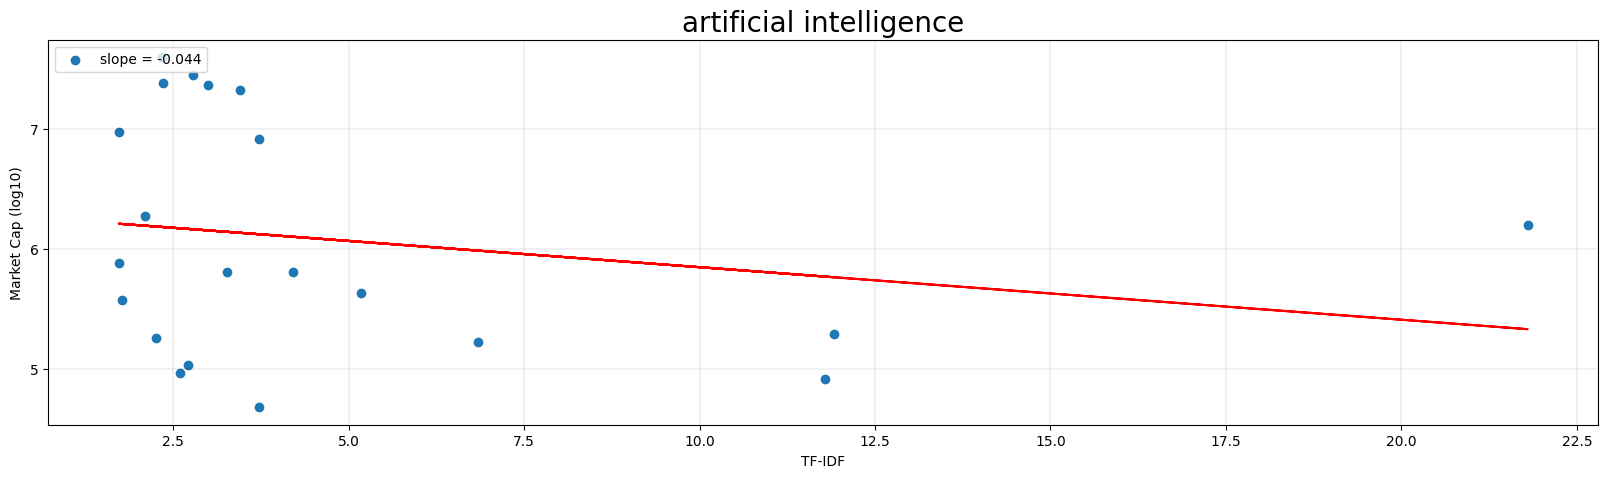

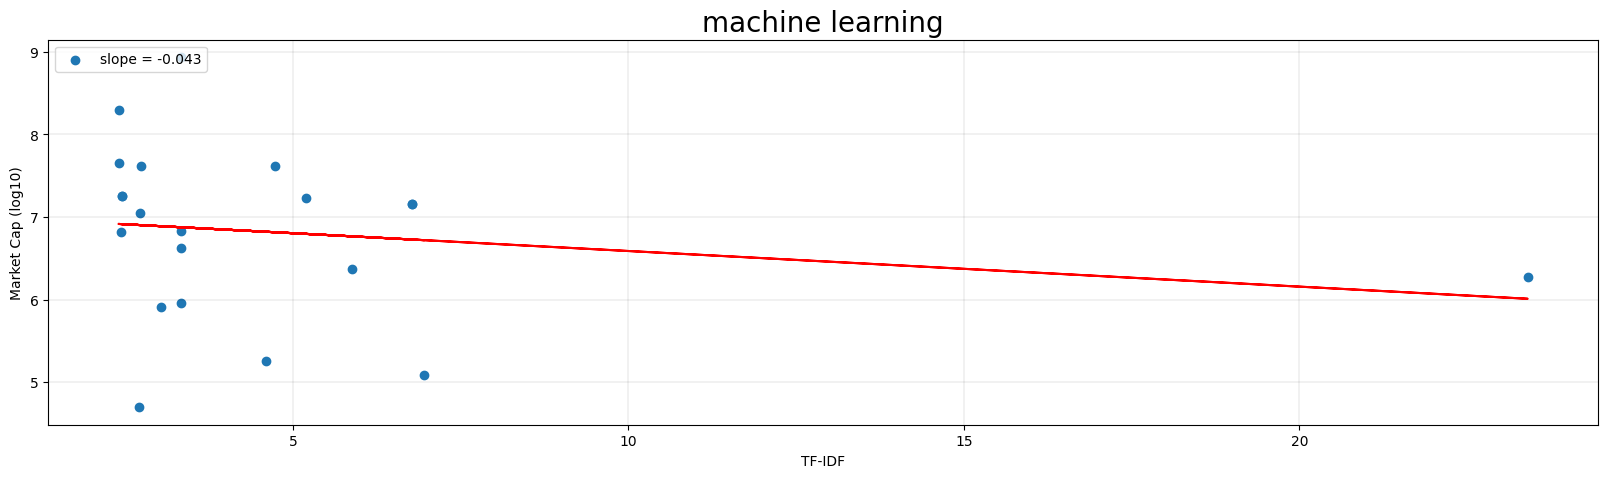

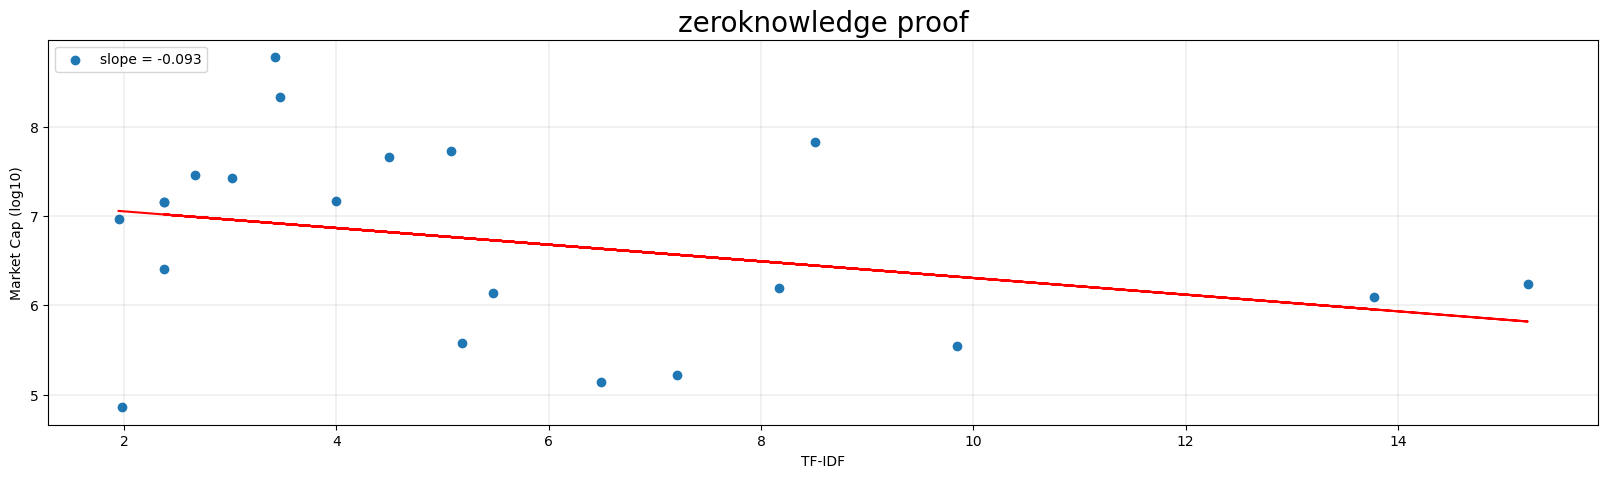

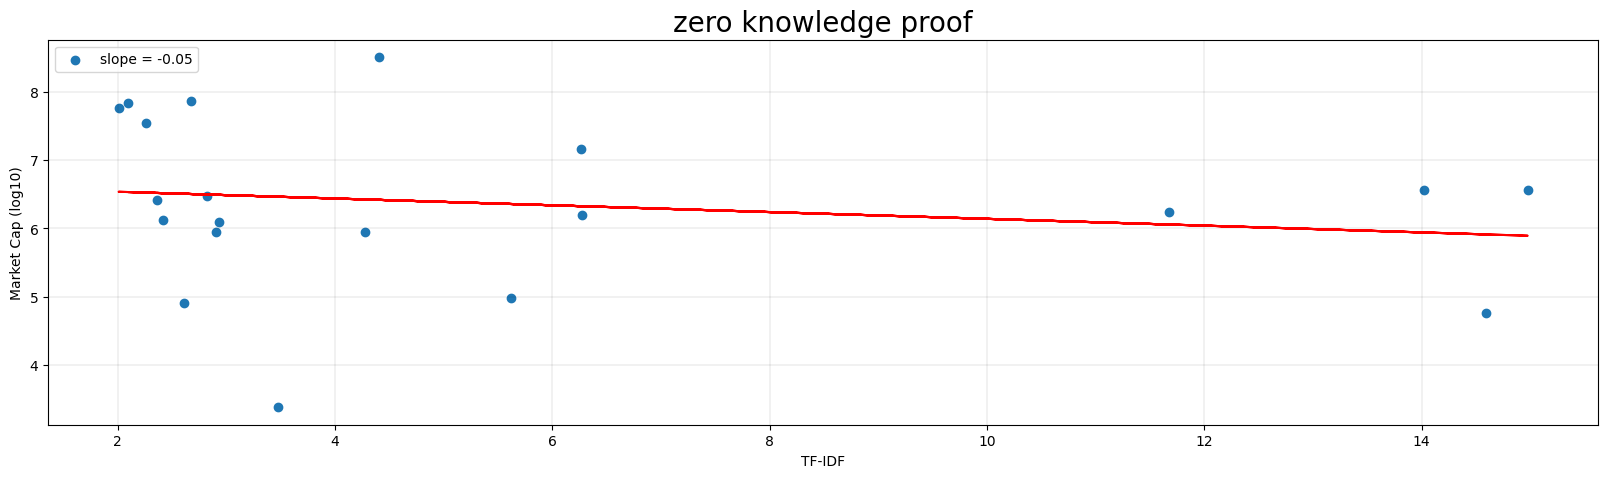

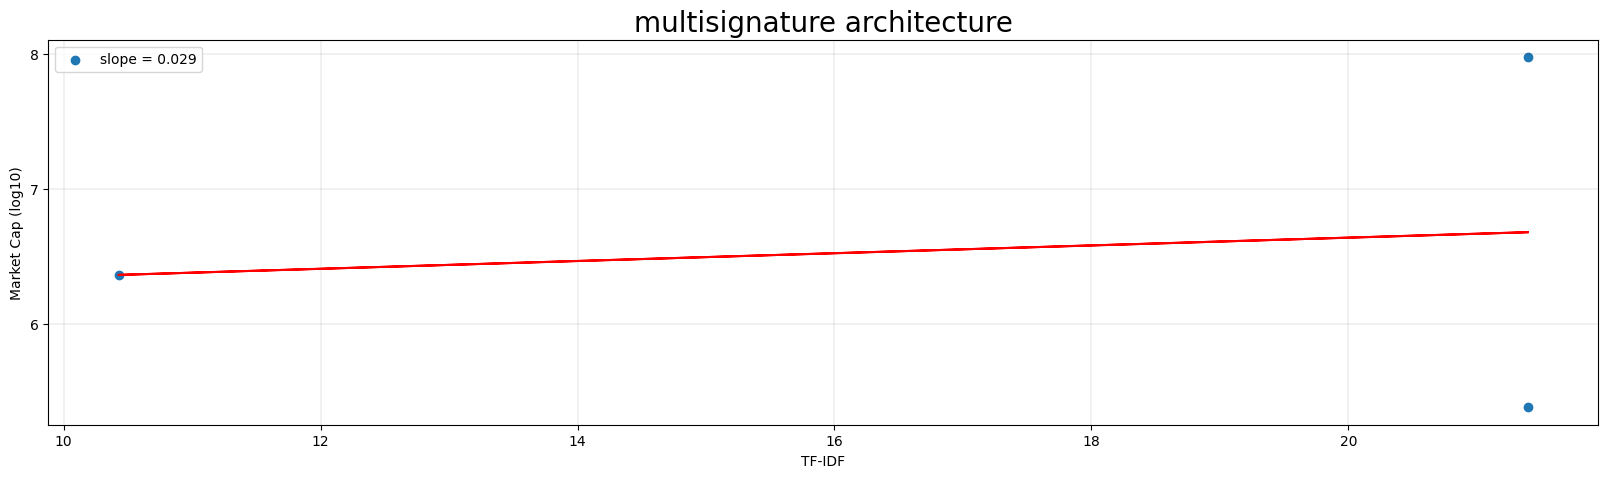

multi signature architecture is not good for visualization


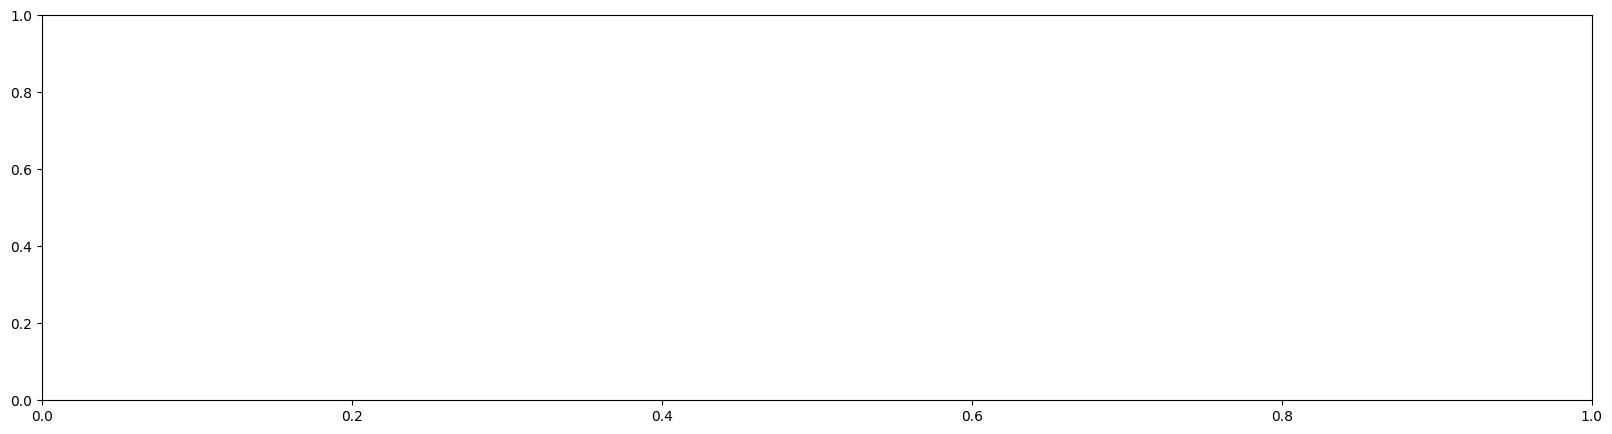

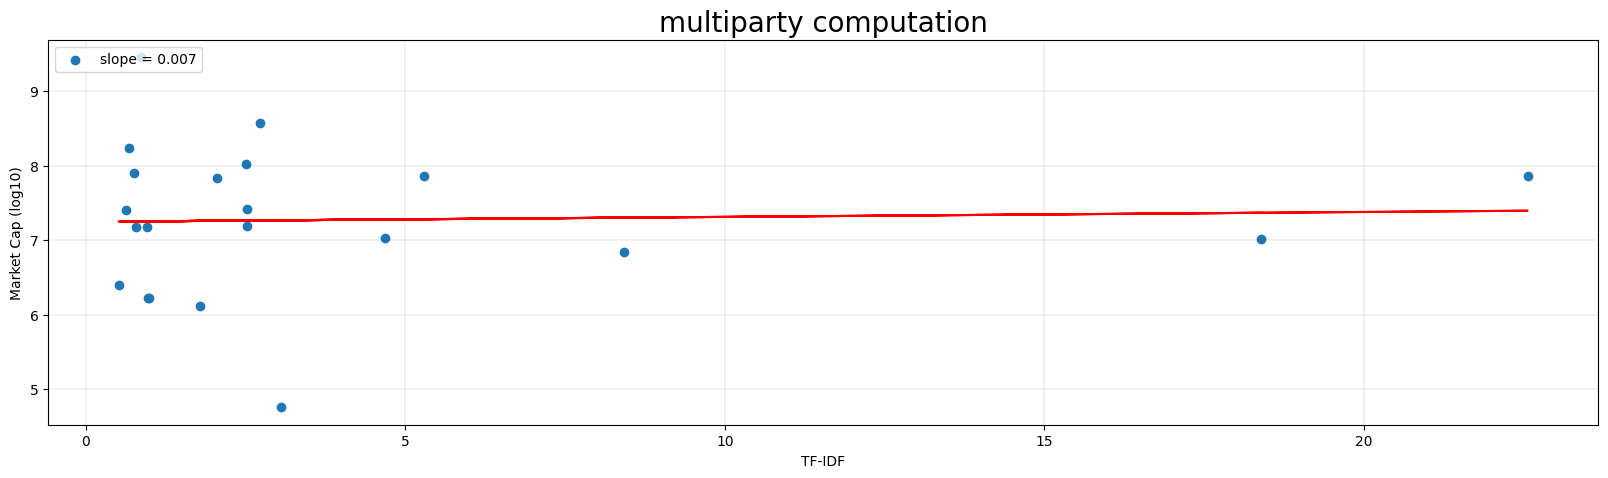

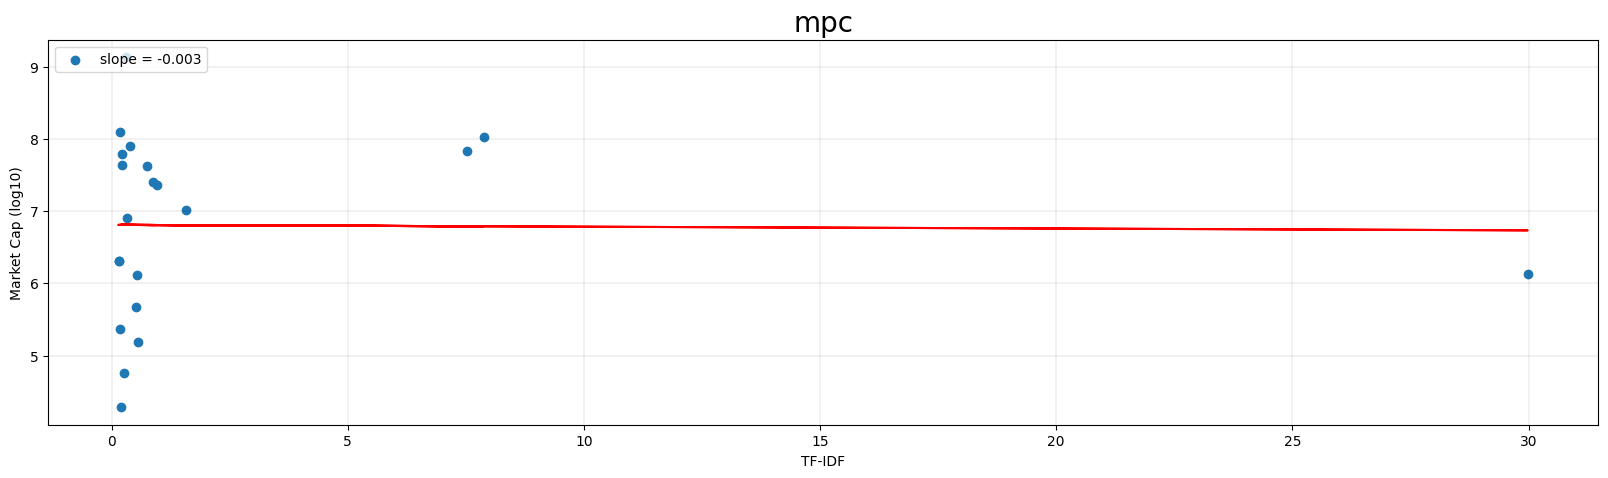

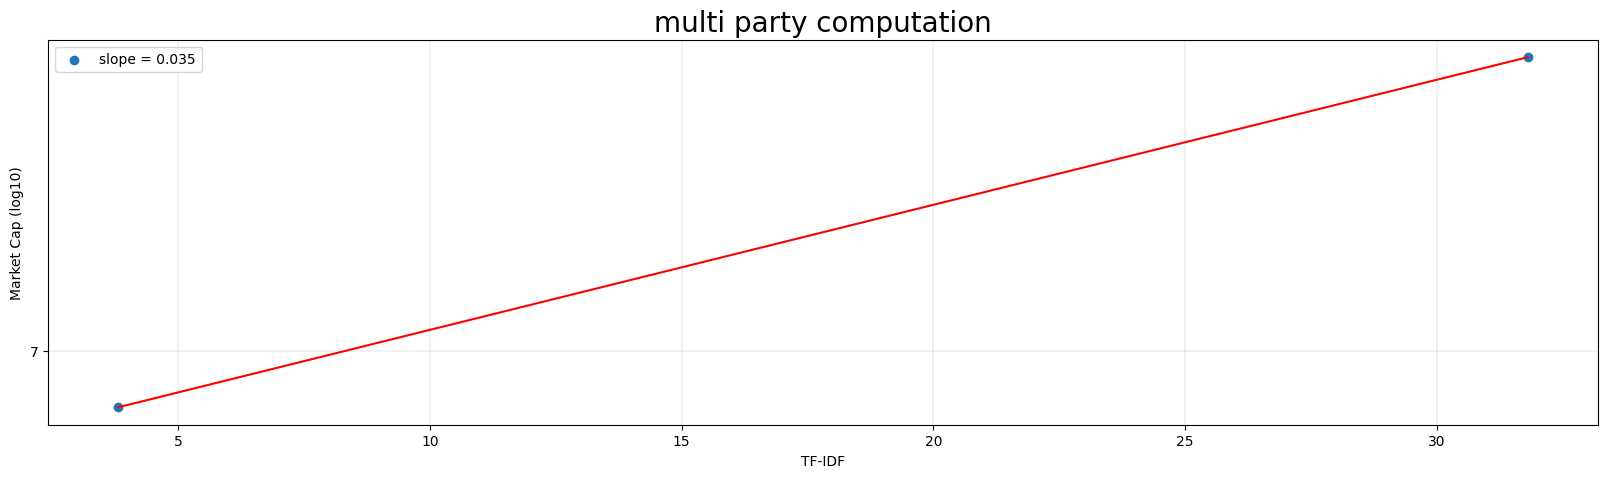

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


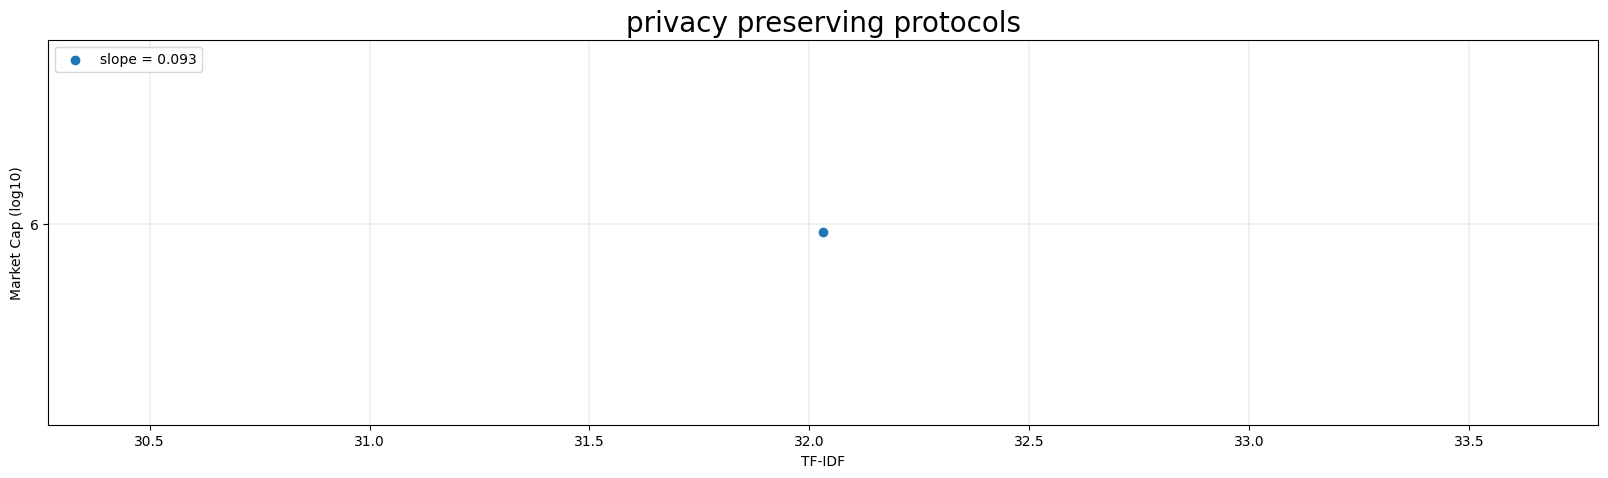

privacypreserving protocols is not good for visualization


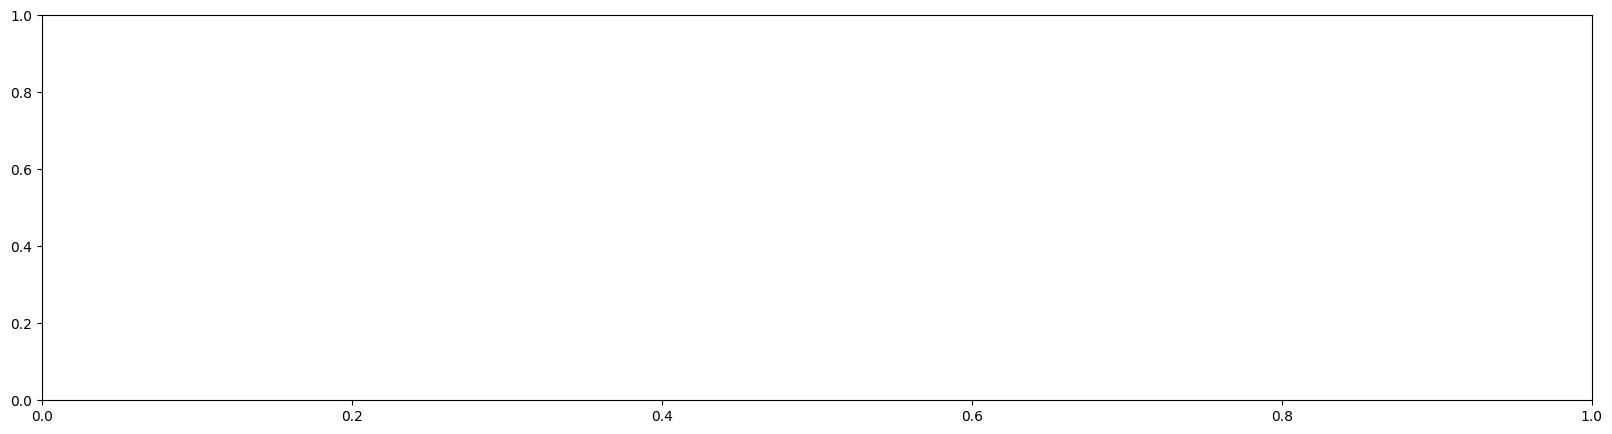

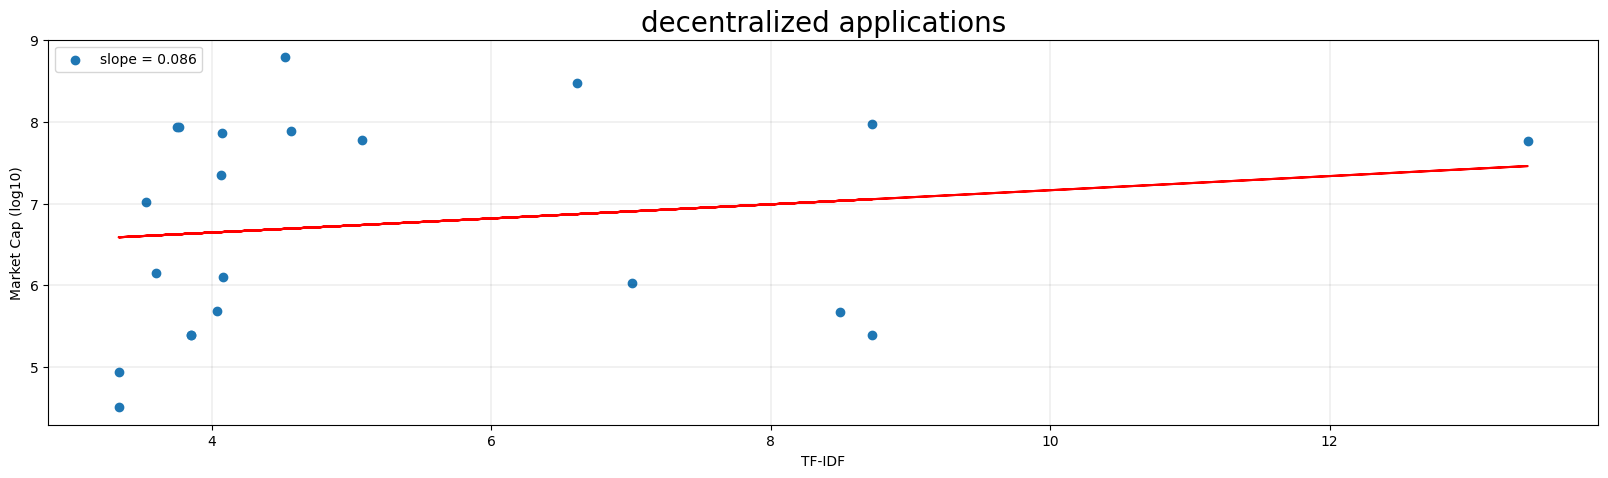

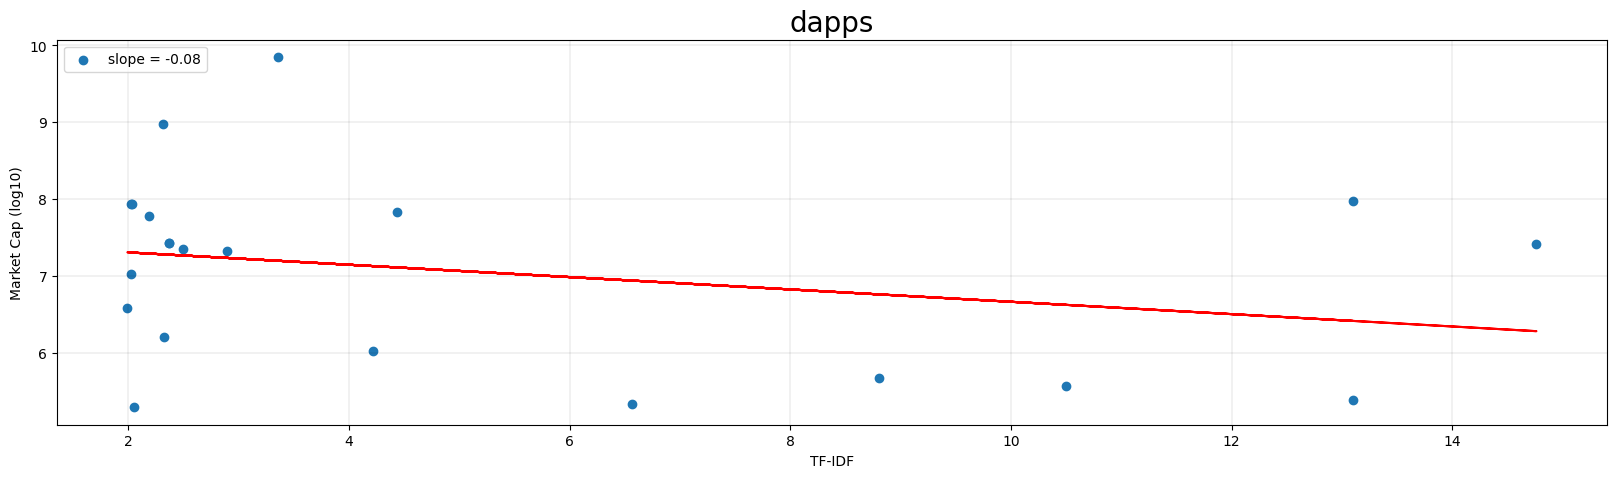

In [56]:
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]
    fig = plt.figure(figsize=(20,5))
    fig.add_subplot(111)

    try:
        x = top_df[i]
        y=np.log10(top_df.market_cap)
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)

        plt.scatter(x, y)

        plt.title(f'{i}', fontsize = 20)
        plt.xlabel('TF-IDF')
        plt.ylabel('Market Cap (log10)')

        plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
        plt.grid(color='black', linestyle='-', linewidth=0.08)
        plt.plot(x,p(x),"r-")

        #slope in the legend
        plt.legend([f'slope = {round(z[0], 3)}'], loc='upper left')

        # plt.xticks([0, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008])
        # plt.hlines(y = 5, xmin = 0, xmax = 13, colors= 'black')
        # plt.vlines(x = 5, ymin = 0, ymax = 13, colors= 'black')
        plt.show()
    except Exception:
        print(f'{i} is not good for visualization')

# Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [91]:
top_2 = all_df['smart contract'].quantile(0.98)
top_df = all_df[all_df['smart contract'] > top_2]
X = top_df['smart contract'].values.reshape(-1,1)
y = np.log10(top_df.market_cap).values.reshape(-1,1)
lm = LinearRegression().fit(X, y)
lm.score(X, y)

0.031372496943011585

In [92]:
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = [params,sd_b,ts_b,p_values]
print(myDF3)

   Coefficients  Standard_Errors  t_Value  P_Value
0        5.5806            1.142    4.889    0.000
1        0.1844            0.235    0.784    0.442


In [114]:
new_list = []
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]

    try:
        X = top_df[i].values.reshape(-1,1)
        y = np.log10(top_df.market_cap).values.reshape(-1,1)


        lm = LinearRegression().fit(X, y)
        lm.score(X, y)
        params = np.append(lm.intercept_,lm.coef_)
        predictions = lm.predict(X)
        newX = np.append(np.ones((len(X),1)), X, axis=1)
        MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
        var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params/ sd_b
        p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

        sd_b = np.round(sd_b,3)
        ts_b = np.round(ts_b,3)
        p_values = np.round(p_values,3)
        params = np.round(params,4)

        params, sd_b, ts_b, p_values = params[1],sd_b[1],ts_b[1],p_values[1]

    except Exception:
        # myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = ['-','-','-','-']
        params,sd_b,ts_b,p_values = [np.NaN,np.NaN,np.NaN,np.NaN]
        # pass
        # print(f'{i} is not good for regression')
    new_list.append([i, params,sd_b,ts_b,p_values])
myDF3 = pd.DataFrame(new_list, columns = ['Term','Coefficients','Standard_Errors','t_Value','P_Value'])

/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_45207/3089715971.py:17: RuntimeWarning: divide by zero encountered in divide
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_45207/3089715971.py:17: RuntimeWarning: divide by zero encountered in divide
  MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
/Users/alisdghnia/opt/anaconda3/envs/CryptoResearch/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [115]:
myDF3

,Term,Coefficients,Standard_Errors,t_Value,P_Value
0,blockchain,0.0311,0.187,0.166,0.870
1,smart contract,0.1844,0.235,0.784,0.442
2,proof work,NaN,NaN,NaN,NaN
3,proofofwork,0.1357,0.144,0.940,0.359
4,pow,0.1697,0.101,1.681,0.109
5,proof stake,NaN,NaN,NaN,NaN
6,proofofstake,-0.0557,0.066,-0.846,0.408
7,pos,-0.0084,0.186,-0.045,0.964
8,multisig,0.2901,0.114,2.544,0.020
9,hash rate,-0.0161,0.051,-0.317,0.754


In [116]:
final_df = myDF3.dropna(how='any')

In [117]:
final_df

,Term,Coefficients,Standard_Errors,t_Value,P_Value
0,blockchain,0.0311,0.187,0.166,0.870
1,smart contract,0.1844,0.235,0.784,0.442
3,proofofwork,0.1357,0.144,0.940,0.359
4,pow,0.1697,0.101,1.681,0.109
6,proofofstake,-0.0557,0.066,-0.846,0.408
7,pos,-0.0084,0.186,-0.045,0.964
8,multisig,0.2901,0.114,2.544,0.020
9,hash rate,-0.0161,0.051,-0.317,0.754
10,merkle tree,0.0450,0.114,0.395,0.698
11,side chain,0.1270,0.050,2.549,0.020


In [118]:
final_df.sort_values(by = 'Coefficients', ascending = False)

,Term,Coefficients,Standard_Errors,t_Value,P_Value
8,multisig,0.2901,0.114,2.544,0.020
1,smart contract,0.1844,0.235,0.784,0.442
4,pow,0.1697,0.101,1.681,0.109
3,proofofwork,0.1357,0.144,0.940,0.359
11,side chain,0.1270,0.050,2.549,0.020
27,decentralized applications,0.0865,0.114,0.760,0.457
15,delegated pos,0.0743,0.246,0.302,0.813
10,merkle tree,0.0450,0.114,0.395,0.698
0,blockchain,0.0311,0.187,0.166,0.870
20,multisignature architecture,0.0288,0.205,0.141,0.911


In [119]:
final_df.sort_values(by = 'P_Value')

,Term,Coefficients,Standard_Errors,t_Value,P_Value
8,multisig,0.2901,0.114,2.544,0.020
11,side chain,0.1270,0.050,2.549,0.020
4,pow,0.1697,0.101,1.681,0.109
18,zeroknowledge proof,-0.0933,0.063,-1.473,0.157
28,dapps,-0.0803,0.063,-1.267,0.221
16,artificial intelligence,-0.0437,0.045,-0.973,0.343
3,proofofwork,0.1357,0.144,0.940,0.359
6,proofofstake,-0.0557,0.066,-0.846,0.408
17,machine learning,-0.0431,0.051,-0.840,0.411
1,smart contract,0.1844,0.235,0.784,0.442


In [38]:
new_list = []
for i in all_df.columns[3:]:
    
    top_2 = all_df[i].quantile(0.98)
    top_df = all_df[all_df[i] > top_2]

    try:
        x = top_df[i]
        y=np.log10(top_df.market_cap)
        reg = LinearRegression().fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
        # print(f'{i}: {reg.coef_} {reg.intercept_}')
    except Exception:
        pass
        # print(f'{i} is not good for regression')

    new_list.append([i, reg.coef_, reg.intercept_])

In [39]:
new_list

[['blockchain', array([[0.03109682]]), array([6.83125074])],
 ['smart contract', array([[0.18444432]]), array([5.58061416])],
 ['proof work', array([[0.18444432]]), array([5.58061416])],
 ['proofofwork', array([[0.13572815]]), array([6.03216195])],
 ['pow', array([[0.16968113]]), array([5.43707239])],
 ['proof stake', array([[0.]]), array([7.44974175])],
 ['proofofstake', array([[-0.05568872]]), array([6.95615632])],
 ['pos', array([[-0.00844755]]), array([6.55113103])],
 ['multisig', array([[0.29014232]]), array([5.06571698])],
 ['hash rate', array([[-0.01605347]]), array([6.42467684])],
 ['merkle tree', array([[0.04504313]]), array([6.78202085])],
 ['side chain', array([[0.12703434]]), array([6.00738709])],
 ['multicoin wallet', array([[-0.20566568]]), array([10.2497552])],
 ['multisig wallet', array([[-0.04576672]]), array([6.50244769])],
 ['delegated proof stake', array([[-0.04576672]]), array([6.50244769])],
 ['delegated pos', array([[0.07426496]]), array([7.75009226])],
 ['artifi

In [40]:
df_reg = pd.DataFrame(new_list, columns=['term', 'coef', 'intercept'])
df_reg

,term,coef,intercept
0,blockchain,[[0.03109681992845116]],[6.831250738239729]
1,smart contract,[[0.18444431943844208]],[5.580614162981062]
2,proof work,[[0.18444431943844208]],[5.580614162981062]
3,proofofwork,[[0.13572814843003328]],[6.032161952890783]
4,pow,[[0.16968113271871763]],[5.437072391139305]
5,proof stake,[[0.0]],[7.449741750169486]
6,proofofstake,[[-0.055688718178503155]],[6.956156318897327]
7,pos,[[-0.00844754940462945]],[6.5511310349815455]
8,multisig,[[0.29014231939579854]],[5.065716980891294]
9,hash rate,[[-0.01605346660765679]],[6.4246768391567395]


In [41]:
df_reg['coef'] = df_reg['coef'].apply(lambda x: x[0][0])
df_reg['intercept'] = df_reg['intercept'].apply(lambda x: x[0])

In [42]:
df_reg.sort_values(by='coef', ascending=False)

,term,coef,intercept
8,multisig,0.290142,5.065717
2,proof work,0.184444,5.580614
1,smart contract,0.184444,5.580614
4,pow,0.169681,5.437072
3,proofofwork,0.135728,6.032162
11,side chain,0.127034,6.007387
27,decentralized applications,0.086455,6.298452
15,delegated pos,0.074265,7.750092
10,merkle tree,0.045043,6.782021
24,multi party computation,0.035337,6.707262


# Multivariable LinReg

In [44]:
all_df.iloc[:, 3:]

,blockchain,smart contract,proof work,proofofwork,pow,proof stake,proofofstake,pos,multisig,hash rate,...,zero knowledge proof,multisignature architecture,multi signature architecture,multiparty computation,mpc,multi party computation,privacy preserving protocols,privacypreserving protocols,decentralized applications,dapps
1,0.000615,0.000307,0.0,0.0,0.000000,0.0,0.000000,0.000307,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000530,0.000000,0.0,0.0,0.000235,0.0,0.000000,0.000647,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.001095,0.000360,0.0,0.0,0.000030,0.0,0.000045,0.000525,0.00009,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000060
7,0.001014,0.000000,0.0,0.0,0.000078,0.0,0.000000,0.000468,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000039,0.000000
9,0.000286,0.000261,0.0,0.0,0.000025,0.0,0.000000,0.000535,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.000042,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000513,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1693,0.000068,0.000158,0.0,0.0,0.000113,0.0,0.000045,0.000814,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000023
1694,0.000804,0.000262,0.0,0.0,0.000017,0.0,0.000000,0.000455,0.00000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1695,0.001118,0.000219,0.0,0.0,0.000196,0.0,0.000000,0.001049,0.00000,0.0,...,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.000231


In [139]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = all_df.iloc[:, 3:]
y = np.log10(all_df.market_cap)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             market_cap   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.947
Date:                Wed, 01 Mar 2023   Prob (F-statistic):            0.00366
Time:                        14:25:11   Log-Likelihood:                -1783.1
No. Observations:                1027   AIC:                             3618.
Df Residuals:                    1001   BIC:                             3746.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [51]:
lst = []
for i in all_df.columns[3:]:
    try:
        top_2 = all_df[i].quantile(0.98)
        top_df = all_df[all_df[i] > top_2]

        X = top_df.iloc[:, 3:]
        y = np.log10(top_df.market_cap)

        slope, intercept, r_value, p_value, std_err = np.round(stats.linregress(x,y), 3)
        print(i, ': ', p_value)
    except Exception:
        slope, intercept, p_value = '-', '-', '-'
    lst.append([i, slope, intercept, p_value])

blockchain :  0.084
smart contract :  0.625
proofofwork :  0.421
pow :  0.299
proofofstake :  0.287
pos :  0.981
multisig :  0.989
hash rate :  0.855
merkle tree :  0.502
side chain :  0.165
multisig wallet :  0.163
artificial intelligence :  0.625
machine learning :  0.392
zeroknowledge proof :  0.981
multiparty computation :  0.184
mpc :  0.444
decentralized applications :  0.828
dapps :  0.221


In [52]:
df_lst = pd.DataFrame(lst, columns=['term', 'slope', 'intercept', 'p_value'])
df_lst

,term,slope,intercept,p_value
0,blockchain,-0.108,7.501,0.084
1,smart contract,0.038,6.249,0.625
2,proof work,-,-,-
3,proofofwork,0.082,6.423,0.421
4,pow,0.076,5.927,0.299
5,proof stake,-,-,-
6,proofofstake,-0.075,7.048,0.287
7,pos,-0.002,6.523,0.981
8,multisig,-0.001,6.741,0.989
9,hash rate,-0.012,6.415,0.855


# Drop the bad terms

In [140]:
new_df = all_df.drop(columns=['proof work', 'proof stake', 'multicoin wallet', 'delegated proof stake',
                              'multi signature architecture', 'multi party computation', 'privacy preserving protocols', 'privacypreserving protocols'])

In [141]:
new_df

,Name,market_cap,volume_y,blockchain,smart contract,proofofwork,pow,proofofstake,pos,multisig,...,delegated pos,artificial intelligence,machine learning,zeroknowledge proof,zero knowledge proof,multisignature architecture,multiparty computation,mpc,decentralized applications,dapps
1,Neural Protocol - Whitepaper,1.074150e+05,0.000000e+00,-0.173120,0.177999,-0.21703,-0.555823,-0.184607,-0.657915,-0.263519,...,-0.050348,2.714920,-0.202984,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.227662
2,Idena - Whitepaper,7.561350e+05,2.432000e+04,-0.303961,-0.706192,-0.21703,0.114753,-0.184607,0.073319,-0.263519,...,-0.050348,-0.170649,-0.202984,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.227662
4,0chain - Whitepaper,8.702623e+06,9.034700e+04,0.563206,0.328962,-0.21703,-0.470371,0.281328,-0.190024,1.334315,...,-0.050348,-0.170649,-0.202984,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,0.096152
7,SmartMesh - Whitepaper,1.243439e+06,5.655200e+04,0.439717,-0.706192,-0.21703,-0.333540,-0.184607,-0.312147,-0.263519,...,-0.050348,0.561663,-0.202984,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,0.917100,-0.227662
9,Evedo - Whitepaper,1.834120e+05,6.310600e+04,-0.677494,0.045201,-0.21703,-0.484935,-0.184607,-0.168353,-0.263519,...,-0.050348,-0.170649,-0.202984,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.227662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,ZClassic - Whitepaper,3.467130e+05,2.500000e+01,-1.052760,-0.706192,-0.21703,-0.555823,-0.184607,-0.216468,-0.263519,...,-0.050348,-0.170649,-0.202984,9.843130,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.227662
1693,Celo Dollar - Whitepaper,4.588473e+07,4.392350e+05,-1.012505,-0.251217,-0.21703,-0.233898,0.283483,0.431132,-0.263519,...,-0.050348,-0.170649,-0.202984,4.495792,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.105670
1694,Everex - Whitepaper,2.119030e+05,2.759000e+03,0.117326,0.047986,-0.21703,-0.506017,-0.184607,-0.341415,-0.263519,...,-0.050348,-0.170649,0.478352,-0.171916,-0.123570,-0.051971,-0.087858,-0.054532,-0.294167,-0.227662
1695,Cartesi - Whitepaper,6.410724e+07,4.180223e+06,0.598947,-0.076334,-0.21703,0.002432,-0.184607,0.937483,-0.263519,...,-0.050348,-0.170649,-0.202984,1.018430,0.788994,-0.051971,-0.087858,-0.054532,0.779499,1.016742


In [142]:
X = new_df.iloc[:, 3:]
y = np.log10(new_df.market_cap)


lm = LinearRegression().fit(X, y)
lm.score(X, y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
# var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
# sd_b = np.sqrt(var_b)
sd_b = MSE
ts_b = params / sd_b
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard_Errors"],myDF3["t_Value"],myDF3["P_Value"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard_Errors  t_Value  P_Value
0         6.5164            1.931    3.375    0.001
1        -0.0166            1.931   -0.009    0.993
2        -0.0262            1.931   -0.014    0.989
3         0.0659            1.931    0.034    0.973
4        -0.0035            1.931   -0.002    0.999
5        -0.0276            1.931   -0.014    0.989
6         0.0798            1.931    0.041    0.967
7         0.1198            1.931    0.062    0.951
8        -0.0286            1.931   -0.015    0.988
9         0.1402            1.931    0.073    0.942
10        0.0443            1.931    0.023    0.982
11       -0.0774            1.931   -0.040    0.968
12        0.1387            1.931    0.072    0.943
13       -0.0674            1.931   -0.035    0.972
14        0.0233            1.931    0.012    0.990
15        0.0191            1.931    0.010    0.992
16       -0.0559            1.931   -0.029    0.977
17       -0.0950            1.931   -0.049    0.961
18        0.

In [143]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = new_df.iloc[:, 3:]
y = np.log10(new_df.market_cap)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             market_cap   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.241
Date:                Wed, 01 Mar 2023   Prob (F-statistic):            0.00112
Time:                        14:41:15   Log-Likelihood:                -1784.0
No. Observations:                1027   AIC:                             3612.
Df Residuals:                    1005   BIC:                             3720.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             